In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib
from scipy import stats

In [2]:
spy = yf.Ticker('SPY')
spy =spy.history(start='2010-01-01', end='2020-01-01')
spy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,91.39,91.41,90.27,90.31,90637900,0.0,0
2010-01-04,91.06,91.89,90.37,91.84,118944600,0.0,0
2010-01-05,91.79,92.13,91.45,92.08,111579900,0.0,0
2010-01-06,92.00,92.38,91.92,92.15,116074400,0.0,0
2010-01-07,91.98,92.65,91.72,92.54,131091100,0.0,0


In [3]:
#SMA
spy['SMA_5'] = talib.SMA(spy['Close'], 5)
spy['SMA_50'] = talib.SMA(spy['Close'], 50)

#EMA
spy['EMA_5'] = talib.EMA(spy['Close'], 5)
spy['EMA_50'] = talib.EMA(spy['Close'], 50)

#KAMA
spy['KAMA_5'] = talib.KAMA(spy['Close'], 5)
spy['KAMA_50'] = talib.KAMA(spy['Close'], 50)

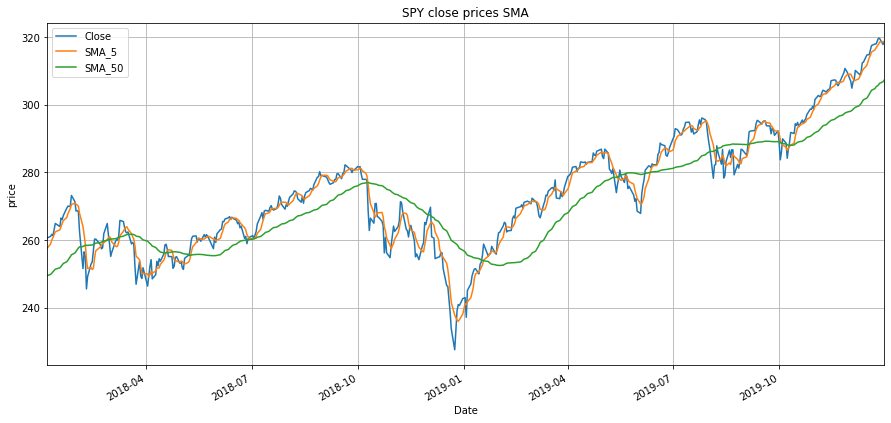

In [4]:
#plotting the last 500 days
spy[['Close','SMA_5','SMA_50']][-500:].plot(figsize=(15,7))
plt.title('SPY close prices SMA')
plt.xlabel('Date')
plt.ylabel('price')
plt.grid()
plt.show()

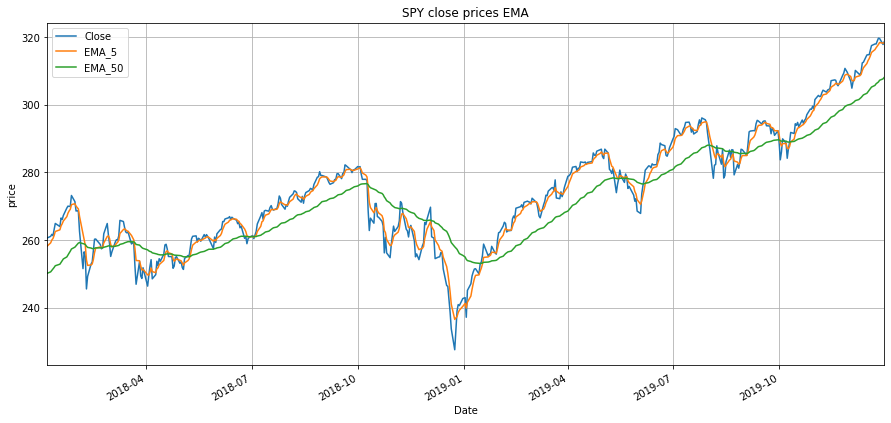

In [5]:
#plotting the last 500 days
spy[['Close','EMA_5','EMA_50']][-500:].plot(figsize=(15,7))
plt.title('SPY close prices EMA')
plt.xlabel('Date')
plt.ylabel('price')
plt.grid()
plt.show()

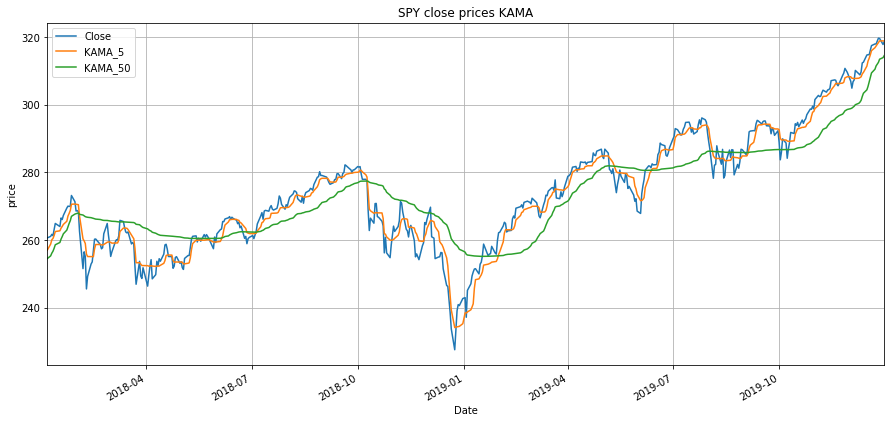

In [6]:
#plotting the last 500 days
spy[['Close','KAMA_5','KAMA_50']][-500:].plot(figsize=(15,7))
plt.title('SPY close prices KAMA')
plt.xlabel('Date')
plt.ylabel('price')
plt.grid()
plt.show()

In [7]:
#use linear regression#consider only slope of regression
spy['slope_50']= 0.0
period= 50
#calculate linear regression slope of each day using 50-day period.
for i in range(period,len(spy)):
    lin=stats.linregress(x=spy['Close'][i-period:i].values, y=range(period))
    spy['slope_50'][i]=lin.slope

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
#use linear regression#consider only slope of regression
spy['slope_10']= 0.0
period= 10
#calculate linear regression slope of each day using 50-day period.
for i in range(period,len(spy)):
    lin=stats.linregress(x=spy['Close'][i-period:i].values, y=range(period))
    spy['slope_10'][i]=lin.slope

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
#use linear regression#consider only slope of regression
spy['slope_250']= 0.0
period= 250
#calculate linear regression slope of each day using 5-day period.
for i in range(period,len(spy)):
    lin=stats.linregress(x=spy['Close'][i-period:i].values, y=range(period))
    spy['slope_250'][i]=lin.slope

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
#daily return (percentage change)
spy['return']=(spy['Close'].pct_change(1)+1)

In [11]:
train_size = int(0.7*spy.shape[0])
train_size

1761

In [12]:
in_sample = spy.iloc[:train_size,:]
in_sample.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_50,EMA_5,EMA_50,KAMA_5,KAMA_50,slope_50,slope_10,slope_250,return
Date,,,,,,,,,,,,,,,,,
2016-12-21,211.57,211.76,211.12,211.12,67909000,0.0,0,211.004,202.8856,210.982436,204.757448,210.342406,204.318161,2.593102,2.324379,6.446196,0.997213
2016-12-22,210.96,211.09,210.33,210.76,56219100,0.0,0,210.986,203.1274,210.908291,204.992843,210.345432,204.696067,2.568495,2.422020,6.434325,0.998295
2016-12-23,210.80,211.07,210.60,211.07,36697800,0.0,0,211.112,203.3884,210.962194,205.231162,210.378757,205.120084,2.553050,1.657904,6.423339,1.001471
2016-12-27,211.36,212.02,211.34,211.59,42672500,0.0,0,211.250,203.6578,211.171463,205.480529,210.440040,205.564556,2.537454,1.524217,6.416990,1.002464
2016-12-28,211.87,211.89,209.72,209.84,64095000,0.0,0,210.876,203.9058,210.727642,205.651488,210.351790,205.814503,2.520096,1.539474,6.404939,0.991729


In [13]:
out_sample = spy.iloc[train_size:,:]
out_sample.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_50,EMA_5,EMA_50,KAMA_5,KAMA_50,slope_50,slope_10,slope_250,return
Date,,,,,,,,,,,,,,,,,
2016-12-29,209.91,210.30,209.32,209.79,48696100,0.0,0,210.610,204.1282,210.415094,205.813783,210.289732,206.021293,2.521357,0.893282,6.396084,0.999762
2016-12-30,210.15,210.24,208.28,209.03,108998300,0.0,0,210.264,204.3248,209.953396,205.939909,210.115585,206.151824,2.520439,-1.692970,6.385542,0.996377
2017-01-03,210.44,211.18,209.35,210.63,91366500,0.0,0,210.176,204.5608,210.178931,206.123834,210.123132,206.393057,2.520404,-2.148523,6.377726,1.007654
2017-01-04,210.98,212.04,210.97,211.88,78744400,0.0,0,210.234,204.8200,210.745954,206.349566,210.139593,206.718840,2.518479,-2.314117,6.366048,1.005935
2017-01-05,211.59,211.88,210.85,211.71,78379000,0.0,0,210.608,205.0588,211.067303,206.559779,210.341443,206.987915,2.510912,-1.026018,6.358795,0.999198


# 50 days Slope

***SMA***

In [14]:
#strategy long-only portfolio
#buy when SMA(5) > SMA(50) and linear regression slope > 0
in_sample['trade_SMA']=np.logical_and(in_sample['SMA_5']>in_sample['SMA_50'], in_sample['slope_50']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade = in_sample[in_sample['trade_SMA']== 1]
in_sample_trade.head()

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_50,EMA_5,EMA_50,KAMA_5,KAMA_50,slope_50,slope_10,slope_250,return,trade_SMA
Date,,,,,,,,,,,,,,,,,,
2010-03-16,93.85,94.43,93.59,94.34,168673000,0.00,0,93.646,90.4308,93.611889,90.506663,93.835736,93.604467,0.077936,2.713435,0.0,1.008014,1
2010-03-17,94.62,95.21,94.35,94.90,177468100,0.00,0,93.992,90.4920,94.041260,90.678950,94.308742,93.623976,0.439626,2.749157,0.0,1.005936,1
2010-03-18,94.91,95.03,94.47,94.85,196509100,0.00,0,94.250,90.5474,94.310840,90.842521,94.519054,93.640908,0.927817,2.856138,0.0,0.999473,1
2010-03-19,94.37,95.44,94.00,94.37,226641100,0.48,0,94.410,90.5918,94.330560,90.980854,94.503455,93.649170,1.370921,3.397236,0.0,0.994939,1
2010-03-22,93.83,95.04,93.77,94.87,184477800,0.00,0,94.666,90.6384,94.510373,91.133369,94.560326,93.663508,1.751873,3.467814,0.0,1.005298,1


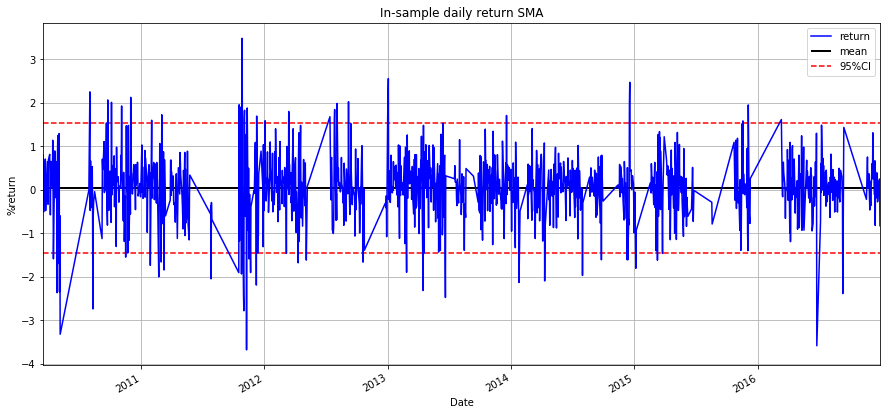

in-sample daily standard deviation of return: 0.760 %
in-sample annualized standard deviation of return: 14.512 %


In [15]:
#plotting in-sample daily return along with mean and 95% confidence interval
((in_sample_trade['return']-1)*100).plot(kind='line',figsize=(15,7),grid=True, style='b')
mean=np.mean(((in_sample_trade['return']-1)*100))
std=np.std(((in_sample_trade['return']-1)*100))
xmin=in_sample_trade.index[0]
xmax=in_sample_trade.index[-1]
plt.hlines(y=mean, xmin=xmin, xmax=xmax, colors='k', label='mean', lw=2)
plt.hlines(y=mean+stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--', label='95%CI')
plt.hlines(y=mean-stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--')
plt.ylabel('%return')
plt.xlabel('Date')
plt.title('In-sample daily return SMA')
plt.legend()
plt.show()
#stadard deviation of in-sample daily return
print("in-sample daily standard deviation of return: {:.3f} %".format(np.std((in_sample_trade['return']-1)* 100)))
#annualized standard deviation
print("in-sample annualized standard deviation of return: {:.3f} %".format((np.std((in_sample_trade['return']-1)* 100))*np.sqrt(365)))

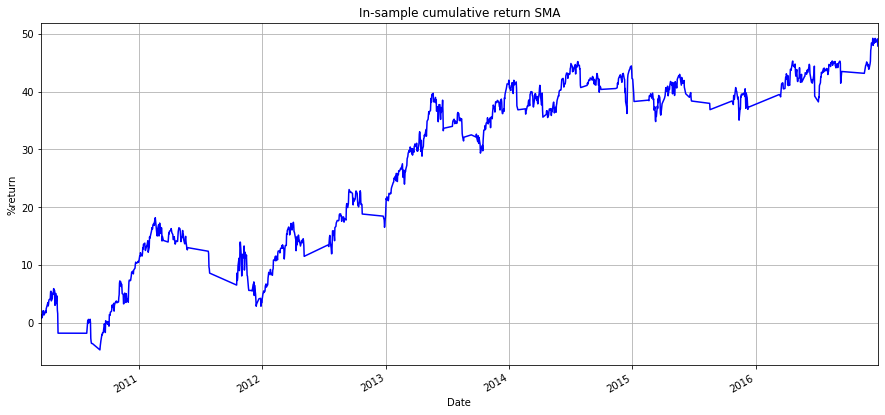

in-sample cumulative return: 47.912 % over 1761 days
in-sample annualized return: 8.452 %


In [16]:
#percentage cumulative return
in_cumu_ret=(in_sample_trade['return'].cumprod()- 1)*100

#plotting in-sample cumulative return
in_cumu_ret.plot(figsize=(15,7), style='b')
plt.title('In-sample cumulative return SMA')
plt.ylabel('%return')
plt.xlabel('Date')
plt.grid()
plt.show()

#in-sample total return
print("in-sample cumulative return: {:.3f} % over {:} days".format(in_cumu_ret[-1],len(in_sample)))
#in-sample annualized return
print("in-sample annualized return: {:.3f} %".format((np.power(((in_sample_trade['return'].cumprod())[-1]), (365/len(in_sample)))-1)*100))

In [17]:
annual_return=(np.power(((in_sample_trade['return'].cumprod())[-1]), (365/len(in_sample)))-1)*100
annual_sd=np.std((in_sample_trade['return']-1)* 100)*np.sqrt(365)
print('in-sample (SMA) return-to-risk ratio: {:.3f}'.format(annual_return/annual_sd))

in-sample (SMA) return-to-risk ratio: 0.582


In [18]:
#consider out-sample
out_sample['trade_SMA']=np.logical_and(out_sample['SMA_5']>out_sample['SMA_50'], out_sample['slope_50']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_SMA']== 1]
out_sample_trade.head()

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_50,EMA_5,EMA_50,KAMA_5,KAMA_50,slope_50,slope_10,slope_250,return,trade_SMA
Date,,,,,,,,,,,,,,,,,,
2016-12-29,209.91,210.30,209.32,209.79,48696100,0.0,0,210.610,204.1282,210.415094,205.813783,210.289732,206.021293,2.521357,0.893282,6.396084,NaN,1
2016-12-30,210.15,210.24,208.28,209.03,108998300,0.0,0,210.264,204.3248,209.953396,205.939909,210.115585,206.151824,2.520439,-1.692970,6.385542,0.996377,1
2017-01-03,210.44,211.18,209.35,210.63,91366500,0.0,0,210.176,204.5608,210.178931,206.123834,210.123132,206.393057,2.520404,-2.148523,6.377726,1.007654,1
2017-01-04,210.98,212.04,210.97,211.88,78744400,0.0,0,210.234,204.8200,210.745954,206.349566,210.139593,206.718840,2.518479,-2.314117,6.366048,1.005935,1
2017-01-05,211.59,211.88,210.85,211.71,78379000,0.0,0,210.608,205.0588,211.067303,206.559779,210.341443,206.987915,2.510912,-1.026018,6.358795,0.999198,1


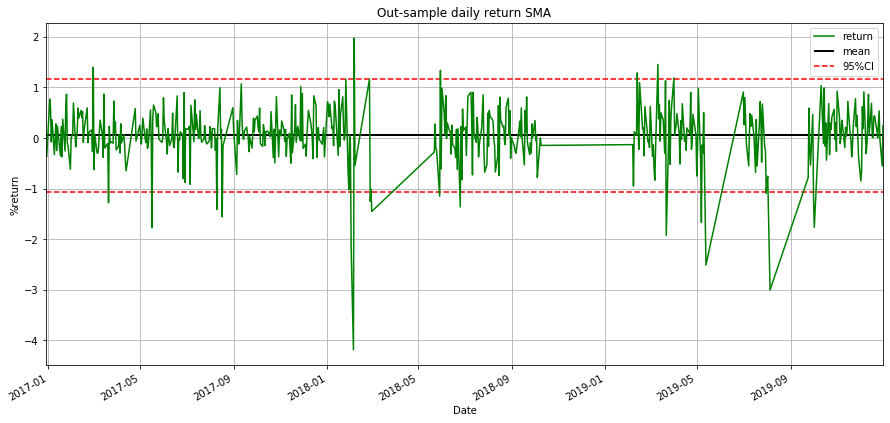

out-sample daily stadard deviation of return: 0.571 %
out-sample annualized stadard deviation of return: 10.917 %


In [19]:
#plotting out-sample daily return along with mean and 95% confidence interval
((out_sample_trade['return']-1)*100).plot(kind='line',figsize=(15,7),grid=True, style='g')
mean=np.mean(((out_sample_trade['return']-1)*100))
std=np.std(((out_sample_trade['return']-1)*100))
xmin=out_sample_trade.index[0]
xmax=out_sample_trade.index[-1]
plt.hlines(y=mean, xmin=xmin, xmax=xmax, colors='k', label='mean', lw=2)
plt.hlines(y=mean+stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--', label='95%CI')
plt.hlines(y=mean-stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--')
plt.ylabel('%return')
plt.xlabel('Date')
plt.title('Out-sample daily return SMA')
plt.legend()
plt.show()
#stadard deviation of out-sample daily return
print("out-sample daily stadard deviation of return: {:.3f} %".format(np.std((out_sample_trade['return']-1)* 100)))
#annualized standard deviation
print("out-sample annualized stadard deviation of return: {:.3f} %".format((np.std((out_sample_trade['return']-1)* 100))*np.sqrt(365)))

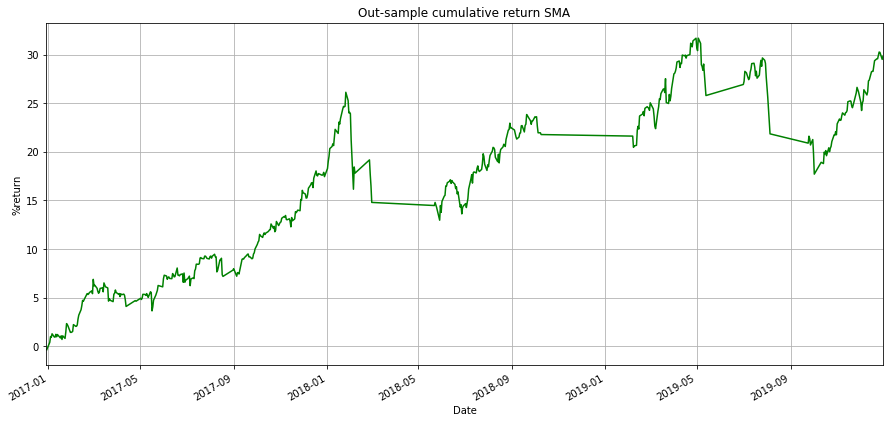

out-sample cumulative return: 29.820 % over 756 days
out-sample annualized return: 13.429 %


In [20]:
out_cumu_ret=(out_sample_trade['return'].cumprod()- 1)*100
#plotting out-sample cumulative return
out_cumu_ret.plot(figsize=(15,7), style='g')
plt.title('Out-sample cumulative return SMA')
plt.ylabel('%return')
plt.xlabel('Date')
plt.grid()
plt.show()
#out-sample total return
print("out-sample cumulative return: {:.3f} % over {:} days".format(out_cumu_ret[-1],len(out_sample)))
#out-sample annualized return
print("out-sample annualized return: {:.3f} %".format((np.power(((out_sample_trade['return'].cumprod())[-1]), (365/len(out_sample)))-1)*100))

In [21]:
annual_return=(np.power(((out_sample_trade['return'].cumprod())[-1]), (365/len(out_sample)))-1)*100
annual_sd=np.std((out_sample_trade['return']-1)* 100)*np.sqrt(365)
print('out-sample (SMA) return-to-risk ratio: {:.3f}'.format(annual_return/annual_sd))

out-sample (SMA) return-to-risk ratio: 1.230


***EMA***

In [22]:
#strategy long-only portfolio
#buy when KAMA(5) > KAMA(50) and linear regression slope > 0
in_sample['trade_EMA']=np.logical_and(in_sample['EMA_5']>in_sample['EMA_50'], in_sample['slope_50']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade=in_sample[in_sample['trade_EMA']== 1]
in_sample_trade.head()

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_50,EMA_5,EMA_50,KAMA_5,KAMA_50,slope_50,slope_10,slope_250,return,trade_SMA,trade_EMA
Date,,,,,,,,,,,,,,,,,,,
2010-03-16,93.85,94.43,93.59,94.34,168673000,0.00,0,93.646,90.4308,93.611889,90.506663,93.835736,93.604467,0.077936,2.713435,0.0,1.008014,1,1
2010-03-17,94.62,95.21,94.35,94.90,177468100,0.00,0,93.992,90.4920,94.041260,90.678950,94.308742,93.623976,0.439626,2.749157,0.0,1.005936,1,1
2010-03-18,94.91,95.03,94.47,94.85,196509100,0.00,0,94.250,90.5474,94.310840,90.842521,94.519054,93.640908,0.927817,2.856138,0.0,0.999473,1,1
2010-03-19,94.37,95.44,94.00,94.37,226641100,0.48,0,94.410,90.5918,94.330560,90.980854,94.503455,93.649170,1.370921,3.397236,0.0,0.994939,1,1
2010-03-22,93.83,95.04,93.77,94.87,184477800,0.00,0,94.666,90.6384,94.510373,91.133369,94.560326,93.663508,1.751873,3.467814,0.0,1.005298,1,1


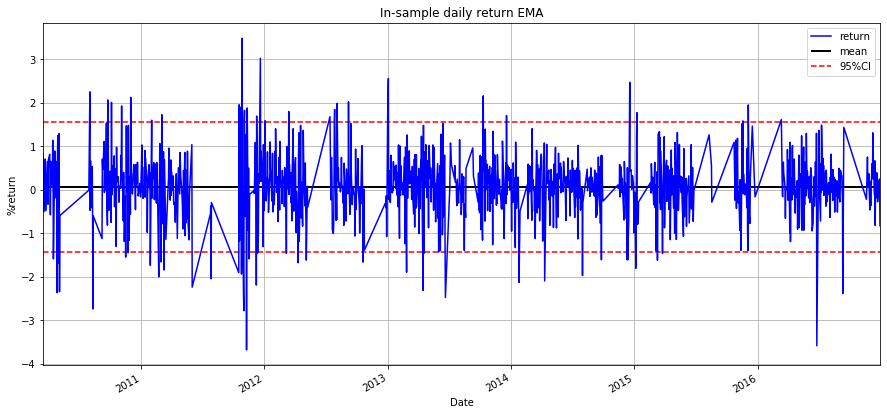

in-sample daily standard deviation of return: 0.760 %
in-sample annualized standard deviation of return: 14.524 %


In [23]:
#plotting in-sample daily return along with mean and 95% confidence interval
((in_sample_trade['return']-1)*100).plot(kind='line',figsize=(15,7),grid=True, style='b')
mean=np.mean(((in_sample_trade['return']-1)*100))
std=np.std(((in_sample_trade['return']-1)*100))
xmin=in_sample_trade.index[0]
xmax=in_sample_trade.index[-1]
plt.hlines(y=mean, xmin=xmin, xmax=xmax, colors='k', label='mean', lw=2)
plt.hlines(y=mean+stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--', label='95%CI')
plt.hlines(y=mean-stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--')
plt.ylabel('%return')
plt.xlabel('Date')
plt.title('In-sample daily return EMA')
plt.legend()
plt.show()
#stadard deviation of in-sample daily return
print("in-sample daily standard deviation of return: {:.3f} %".format(np.std((in_sample_trade['return']-1)* 100)))
#annualized standard deviation
print("in-sample annualized standard deviation of return: {:.3f} %".format((np.std((in_sample_trade['return']-1)* 100))*np.sqrt(365)))

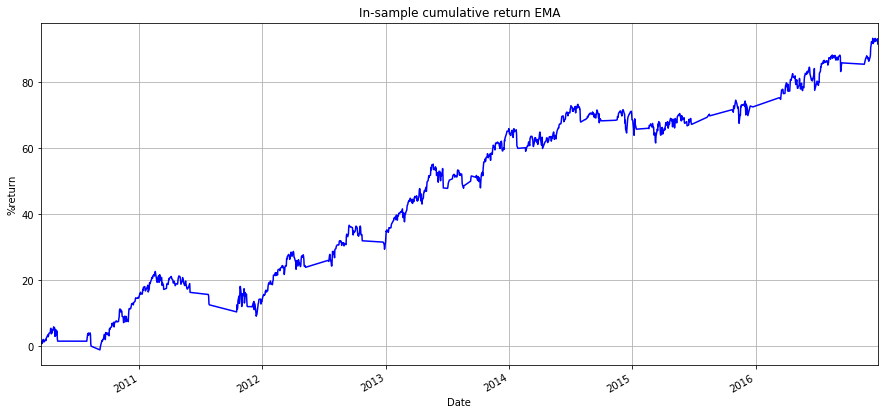

in-sample cumulative return: 91.624 % over 1761 days
in-sample annualized return: 14.431 %


In [24]:
#percentage cumulative return
in_cumu_ret=(in_sample_trade['return'].cumprod()- 1)*100

#plotting in-sample cumulative return
in_cumu_ret.plot(figsize=(15,7), style='b')
plt.title('In-sample cumulative return EMA')
plt.ylabel('%return')
plt.xlabel('Date')
plt.grid()
plt.show()

#in-sample total return
print("in-sample cumulative return: {:.3f} % over {:} days".format(in_cumu_ret[-1],len(in_sample)))
#in-sample annualized return
print("in-sample annualized return: {:.3f} %".format((np.power(((in_sample_trade['return'].cumprod())[-1]), (365/len(in_sample)))-1)*100))

In [25]:
annual_return=(np.power(((in_sample_trade['return'].cumprod())[-1]), (365/len(in_sample)))-1)*100
annual_sd=np.std((in_sample_trade['return']-1)* 100)*np.sqrt(365)
print('in-sample (EMA) return-to-risk ratio: {:.3f}'.format(annual_return/annual_sd))

in-sample (EMA) return-to-risk ratio: 0.994


In [26]:
#consider out-sample
out_sample['trade_EMA']=np.logical_and(out_sample['EMA_5']>out_sample['EMA_50'], out_sample['slope_50']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_EMA']== 1]
out_sample_trade.head()

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_50,EMA_5,EMA_50,KAMA_5,KAMA_50,slope_50,slope_10,slope_250,return,trade_SMA,trade_EMA
Date,,,,,,,,,,,,,,,,,,,
2016-12-29,209.91,210.30,209.32,209.79,48696100,0.0,0,210.610,204.1282,210.415094,205.813783,210.289732,206.021293,2.521357,0.893282,6.396084,NaN,1,1
2016-12-30,210.15,210.24,208.28,209.03,108998300,0.0,0,210.264,204.3248,209.953396,205.939909,210.115585,206.151824,2.520439,-1.692970,6.385542,0.996377,1,1
2017-01-03,210.44,211.18,209.35,210.63,91366500,0.0,0,210.176,204.5608,210.178931,206.123834,210.123132,206.393057,2.520404,-2.148523,6.377726,1.007654,1,1
2017-01-04,210.98,212.04,210.97,211.88,78744400,0.0,0,210.234,204.8200,210.745954,206.349566,210.139593,206.718840,2.518479,-2.314117,6.366048,1.005935,1,1
2017-01-05,211.59,211.88,210.85,211.71,78379000,0.0,0,210.608,205.0588,211.067303,206.559779,210.341443,206.987915,2.510912,-1.026018,6.358795,0.999198,1,1


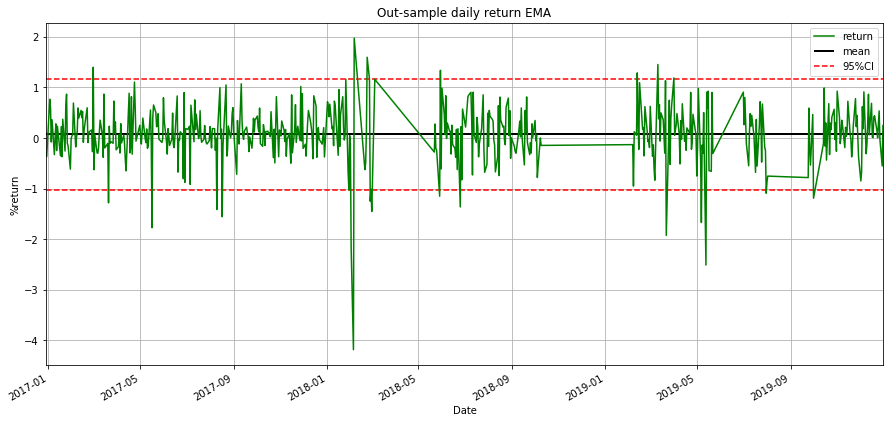

out-sample daily stadard deviation of return: 0.558 %
out-sample annualized stadard deviation of return: 10.652 %


In [27]:
#plotting out-sample daily return along with mean and 95% confidence interval
((out_sample_trade['return']-1)*100).plot(kind='line',figsize=(15,7),grid=True, style='g')
mean=np.mean(((out_sample_trade['return']-1)*100))
std=np.std(((out_sample_trade['return']-1)*100))
xmin=out_sample_trade.index[0]
xmax=out_sample_trade.index[-1]
plt.hlines(y=mean, xmin=xmin, xmax=xmax, colors='k', label='mean', lw=2)
plt.hlines(y=mean+stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--', label='95%CI')
plt.hlines(y=mean-stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--')
plt.ylabel('%return')
plt.xlabel('Date')
plt.title('Out-sample daily return EMA')
plt.legend()
plt.show()
#stadard deviation of out-sample daily return
print("out-sample daily stadard deviation of return: {:.3f} %".format(np.std((out_sample_trade['return']-1)* 100)))
#annualized standard deviation
print("out-sample annualized stadard deviation of return: {:.3f} %".format((np.std((out_sample_trade['return']-1)* 100))*np.sqrt(365)))

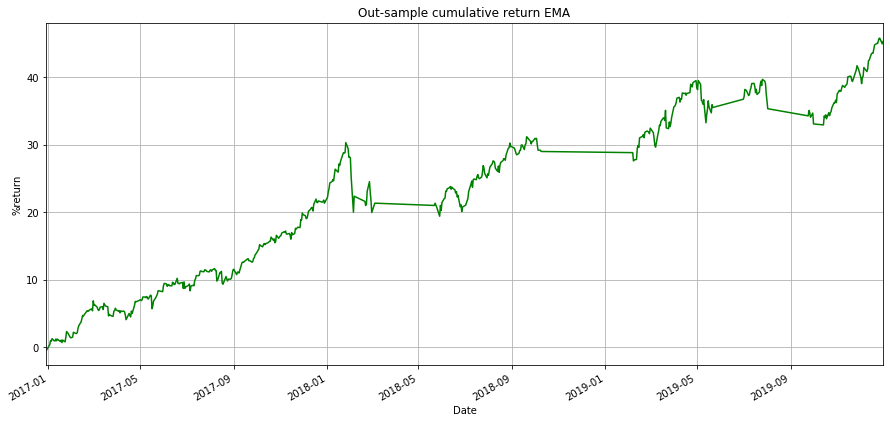

out-sample cumulative return: 45.258 % over 756 days
out-sample annualized return: 19.752 %


In [28]:
out_cumu_ret=(out_sample_trade['return'].cumprod()- 1)*100
#plotting out-sample cumulative return
out_cumu_ret.plot(figsize=(15,7), style='g')
plt.title('Out-sample cumulative return EMA')
plt.ylabel('%return')
plt.xlabel('Date')
plt.grid()
plt.show()
#out-sample total return
print("out-sample cumulative return: {:.3f} % over {:} days".format(out_cumu_ret[-1],len(out_sample)))
#out-sample annualized return
print("out-sample annualized return: {:.3f} %".format((np.power(((out_sample_trade['return'].cumprod())[-1]), (365/len(out_sample)))-1)*100))

In [29]:
annual_return=(np.power(((out_sample_trade['return'].cumprod())[-1]), (365/len(out_sample)))-1)*100
annual_sd=np.std((out_sample_trade['return']-1)* 100)*np.sqrt(365)
print('out-sample (EMA) return-to-risk ratio: {:.3f}'.format(annual_return/annual_sd))

out-sample (EMA) return-to-risk ratio: 1.854


***KAMA***

In [30]:
#strategy long-only portfolio
#buy when KAMA(5) > KAMA(50) and linear regression slope > 0
in_sample['trade_KAMA']=np.logical_and(in_sample['KAMA_5']>in_sample['KAMA_50'], in_sample['slope_50']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade=in_sample[in_sample['trade_KAMA']== 1]
in_sample_trade.head()

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_50,EMA_5,EMA_50,KAMA_5,KAMA_50,slope_50,slope_10,slope_250,return,trade_SMA,trade_EMA,trade_KAMA
Date,,,,,,,,,,,,,,,,,,,,
2010-03-16,93.85,94.43,93.59,94.34,168673000,0.00,0,93.646,90.4308,93.611889,90.506663,93.835736,93.604467,0.077936,2.713435,0.0,1.008014,1,1,1
2010-03-17,94.62,95.21,94.35,94.90,177468100,0.00,0,93.992,90.4920,94.041260,90.678950,94.308742,93.623976,0.439626,2.749157,0.0,1.005936,1,1,1
2010-03-18,94.91,95.03,94.47,94.85,196509100,0.00,0,94.250,90.5474,94.310840,90.842521,94.519054,93.640908,0.927817,2.856138,0.0,0.999473,1,1,1
2010-03-19,94.37,95.44,94.00,94.37,226641100,0.48,0,94.410,90.5918,94.330560,90.980854,94.503455,93.649170,1.370921,3.397236,0.0,0.994939,1,1,1
2010-03-22,93.83,95.04,93.77,94.87,184477800,0.00,0,94.666,90.6384,94.510373,91.133369,94.560326,93.663508,1.751873,3.467814,0.0,1.005298,1,1,1


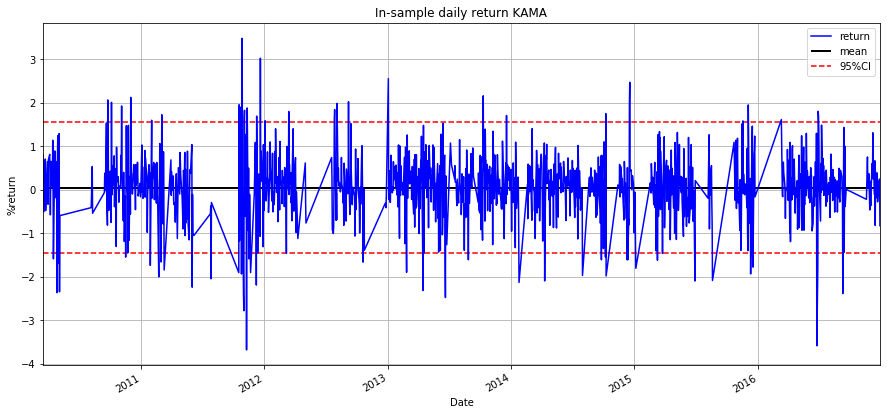

in-sample daily standard deviation of return: 0.770 %
in-sample annualized standard deviation of return: 14.709 %


In [31]:
#plotting in-sample daily return along with mean and 95% confidence interval
((in_sample_trade['return']-1)*100).plot(kind='line',figsize=(15,7),grid=True, style='b')
mean=np.mean(((in_sample_trade['return']-1)*100))
std=np.std(((in_sample_trade['return']-1)*100))
xmin=in_sample_trade.index[0]
xmax=in_sample_trade.index[-1]
plt.hlines(y=mean, xmin=xmin, xmax=xmax, colors='k', label='mean', lw=2)
plt.hlines(y=mean+stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--', label='95%CI')
plt.hlines(y=mean-stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--')
plt.ylabel('%return')
plt.xlabel('Date')
plt.title('In-sample daily return KAMA')
plt.legend()
plt.show()
#stadard deviation of in-sample daily return
print("in-sample daily standard deviation of return: {:.3f} %".format(np.std((in_sample_trade['return']-1)* 100)))
#annualized standard deviation
print("in-sample annualized standard deviation of return: {:.3f} %".format((np.std((in_sample_trade['return']-1)* 100))*np.sqrt(365)))

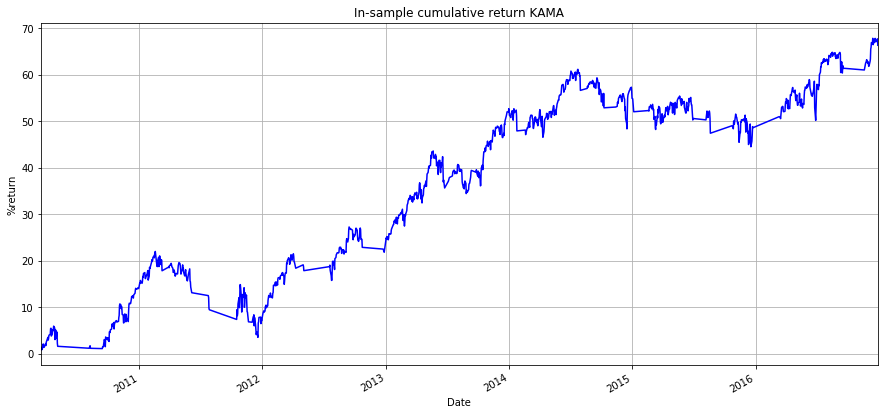

in-sample cumulative return: 66.388 % over 1761 days
in-sample annualized return: 11.130 %


In [32]:
#percentage cumulative return
in_cumu_ret=(in_sample_trade['return'].cumprod()- 1)*100

#plotting in-sample cumulative return
in_cumu_ret.plot(figsize=(15,7), style='b')
plt.title('In-sample cumulative return KAMA')
plt.ylabel('%return')
plt.xlabel('Date')
plt.grid()
plt.show()

#in-sample total return
print("in-sample cumulative return: {:.3f} % over {:} days".format(in_cumu_ret[-1],len(in_sample)))
#in-sample annualized return
print("in-sample annualized return: {:.3f} %".format((np.power(((in_sample_trade['return'].cumprod())[-1]), (365/len(in_sample)))-1)*100))

In [33]:
annual_return=(np.power(((in_sample_trade['return'].cumprod())[-1]), (365/len(in_sample)))-1)*100
annual_sd=np.std((in_sample_trade['return']-1)* 100)*np.sqrt(365)
print('in-sample (KAMA) return-to-risk ratio: {:.3f}'.format(annual_return/annual_sd))

in-sample (KAMA) return-to-risk ratio: 0.757


In [34]:
#consider out-sample
out_sample['trade_KAMA']=np.logical_and(out_sample['KAMA_5']>out_sample['KAMA_50'], out_sample['slope_50']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_KAMA']== 1]
out_sample_trade.head()

C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Edwardus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_50,EMA_5,EMA_50,KAMA_5,KAMA_50,slope_50,slope_10,slope_250,return,trade_SMA,trade_EMA,trade_KAMA
Date,,,,,,,,,,,,,,,,,,,,
2016-12-29,209.91,210.30,209.32,209.79,48696100,0.0,0,210.610,204.1282,210.415094,205.813783,210.289732,206.021293,2.521357,0.893282,6.396084,NaN,1,1,1
2016-12-30,210.15,210.24,208.28,209.03,108998300,0.0,0,210.264,204.3248,209.953396,205.939909,210.115585,206.151824,2.520439,-1.692970,6.385542,0.996377,1,1,1
2017-01-03,210.44,211.18,209.35,210.63,91366500,0.0,0,210.176,204.5608,210.178931,206.123834,210.123132,206.393057,2.520404,-2.148523,6.377726,1.007654,1,1,1
2017-01-04,210.98,212.04,210.97,211.88,78744400,0.0,0,210.234,204.8200,210.745954,206.349566,210.139593,206.718840,2.518479,-2.314117,6.366048,1.005935,1,1,1
2017-01-05,211.59,211.88,210.85,211.71,78379000,0.0,0,210.608,205.0588,211.067303,206.559779,210.341443,206.987915,2.510912,-1.026018,6.358795,0.999198,1,1,1


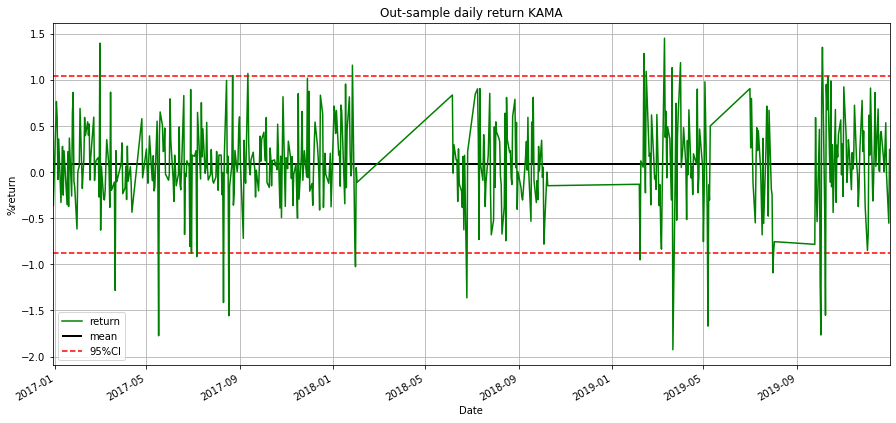

out-sample daily stadard deviation of return: 0.488 %
out-sample annualized stadard deviation of return: 9.315 %


In [35]:
#plotting out-sample daily return along with mean and 95% confidence interval
((out_sample_trade['return']-1)*100).plot(kind='line',figsize=(15,7),grid=True, style='g')
mean=np.mean(((out_sample_trade['return']-1)*100))
std=np.std(((out_sample_trade['return']-1)*100))
xmin=out_sample_trade.index[0]
xmax=out_sample_trade.index[-1]
plt.hlines(y=mean, xmin=xmin, xmax=xmax, colors='k', label='mean', lw=2)
plt.hlines(y=mean+stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--', label='95%CI')
plt.hlines(y=mean-stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--')
plt.ylabel('%return')
plt.xlabel('Date')
plt.title('Out-sample daily return KAMA')
plt.legend()
plt.show()
#stadard deviation of out-sample daily return
print("out-sample daily stadard deviation of return: {:.3f} %".format(np.std((out_sample_trade['return']-1)* 100)))
#annualized standard deviation
print("out-sample annualized stadard deviation of return: {:.3f} %".format((np.std((out_sample_trade['return']-1)* 100))*np.sqrt(365)))

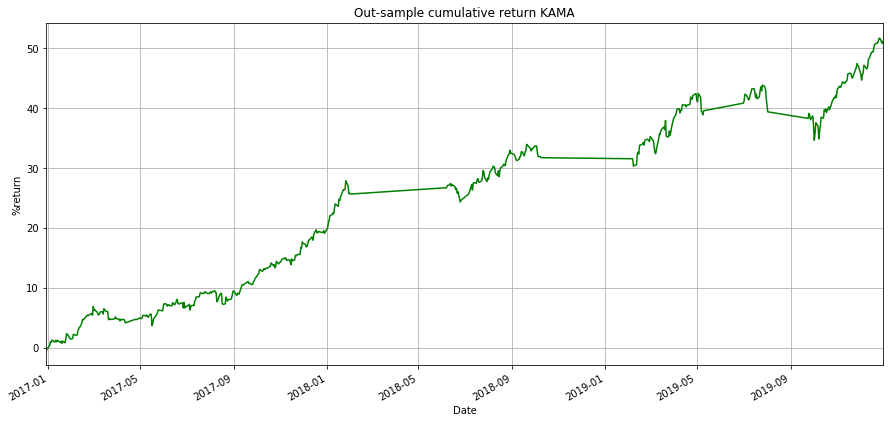

out-sample cumulative return: 51.173 % over 756 days
out-sample annualized return: 22.082 %


In [36]:
out_cumu_ret=(out_sample_trade['return'].cumprod()- 1)*100
#plotting out-sample cumulative return
out_cumu_ret.plot(figsize=(15,7), style='g')
plt.title('Out-sample cumulative return KAMA')
plt.ylabel('%return')
plt.xlabel('Date')
plt.grid()
plt.show()
#out-sample total return
print("out-sample cumulative return: {:.3f} % over {:} days".format(out_cumu_ret[-1],len(out_sample)))
#out-sample annualized return
print("out-sample annualized return: {:.3f} %".format((np.power(((out_sample_trade['return'].cumprod())[-1]), (365/len(out_sample)))-1)*100))

In [37]:
annual_return=(np.power(((out_sample_trade['return'].cumprod())[-1]), (365/len(out_sample)))-1)*100
annual_sd=np.std((out_sample_trade['return']-1)* 100)*np.sqrt(365)
print('out-sample (KAMA) return-to-risk ratio: {:.3f}'.format(annual_return/annual_sd))

out-sample (KAMA) return-to-risk ratio: 2.370


In [38]:
def plot_daily_return(name, in_sample_trade, out_sample_trade):
    #plotting in-sample daily return along with mean and 95% confidence interval
    ((in_sample_trade['return']-1)*100).plot(kind='line',figsize=(15,5),grid=True, style='b')
    mean=np.mean(((in_sample_trade['return']-1)*100))
    std=np.std(((in_sample_trade['return']-1)*100))
    xmin=in_sample_trade.index[0]
    xmax=in_sample_trade.index[-1]
    plt.hlines(y=mean, xmin=xmin, xmax=xmax, colors='k', label='mean', lw=2)
    plt.hlines(y=mean+stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--', label='95%CI')
    plt.hlines(y=mean-stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--')
    plt.ylabel('%return')
    plt.xlabel('Date')
    plt.title('In-sample daily return '+name)
    plt.legend()
    plt.show()

    #plotting out-sample daily return along with mean and 95% confidence interval
    ((out_sample_trade['return']-1)*100).plot(kind='line',figsize=(15,5),grid=True, style='g')
    mean=np.mean(((out_sample_trade['return']-1)*100))
    std=np.std(((out_sample_trade['return']-1)*100))
    xmin=out_sample_trade.index[0]
    xmax=out_sample_trade.index[-1]
    plt.hlines(y=mean, xmin=xmin, xmax=xmax, colors='k', label='mean', lw=2)
    plt.hlines(y=mean+stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--', label='95%CI')
    plt.hlines(y=mean-stats.norm.ppf(1-0.05/2)*std, xmin=xmin, xmax=xmax, color='r', linestyles='--')
    plt.ylabel('%return')
    plt.xlabel('Date')
    plt.title('Out-sample daily return '+name)
    plt.legend()
    plt.show()

In [39]:
def plot_cumu_return(name, in_cumu_ret, out_cumu_ret):
    #percentage cumulative return
    in_cumu_ret=(in_sample_trade['return'].cumprod()- 1)*100

    #plotting in-sample cumulative return
    in_cumu_ret.plot(figsize=(15,5), style='b')
    plt.title('In-sample cumulative return '+name)
    plt.ylabel('%return')
    plt.xlabel('Date')
    plt.grid()
    plt.show()

    out_cumu_ret=(out_sample_trade['return'].cumprod()- 1)*100

    #plotting out-sample cumulative return
    out_cumu_ret.plot(figsize=(15,5), style='g')
    plt.title('Out-sample cumulative return '+name)
    plt.ylabel('%return')
    plt.xlabel('Date')
    plt.grid()
    plt.show()

In [40]:
def results_summary(name, in_sample_trade, out_sample_trade, in_cumu_ret, out_cumu_ret):
    #stadard deviation of in-sample daily return
    print(name+'\n')
    
    print('='*70)
    
    print('in-sample\n')
    
    print('-'*70)
    
    print('\tin-sample daily standard deviation of return: {:.3f} %'.format(np.std((in_sample_trade['return']-1)* 100)))
    #annualized standard deviation
    print('\tin-sample annualized standard deviation of return: {:.3f} %'.format((np.std((in_sample_trade['return']-1)* 100))*np.sqrt(365)))
    
    print('-'*70)
    
    #in-sample total return
    print('\tin-sample cumulative return: {:.3f} % over {:} days'.format(in_cumu_ret[-1],len(in_sample)))
    #in-sample annualized return
    print('\tin-sample annualized return: {:.3f} %'.format((np.power(((in_sample_trade['return'].cumprod())[-1]), (365/len(in_sample)))-1)*100))
    
    print('-'*70)
    
    annual_return=(np.power(((in_sample_trade['return'].cumprod())[-1]), (365/len(in_sample)))-1)*100
    annual_sd=np.std((in_sample_trade['return']-1)* 100)*np.sqrt(365)
    print('\t\tin-sample'+'(name) ' +'return-to-risk ratio: {:.3f}'.format(annual_return/annual_sd))

    print('='*70)

    print('out-sample\n')
    print('-'*70)
    
    #stadard deviation of out-sample daily return
    print('\tout-sample daily stadard deviation of return: {:.3f} %''.format(np.std((out_sample_trade['return']-1)* 100)))
    #annualized standard deviation
    print('\tout-sample annualized stadard deviation of return: {:.3f} %'.format((np.std((out_sample_trade['return']-1)* 100))*np.sqrt(365)))
    
    print('-'*70)
    
    #out-sample total return
    print('\tout-sample cumulative return: {:.3f} % over {:} days'.format(out_cumu_ret[-1],len(out_sample)))
    #out-sample annualized return
    print('\tout-sample annualized return: {:.3f} %'.format((np.power(((out_sample_trade['return'].cumprod())[-1]), (365/len(out_sample)))-1)*100))
    
    print('-'*70)
    
    annual_return=(np.power(((out_sample_trade['return'].cumprod())[-1]), (365/len(out_sample)))-1)*100
    annual_sd=np.std((out_sample_trade['return']-1)* 100)*np.sqrt(365)
    print('\t\tout-sample'+'(name) ' +'return-to-risk ratio: {:.3f}'.format(annual_return/annual_sd))
    
    print('='*70)

SyntaxError: invalid syntax (<ipython-input-40-2be7867db96d>, line 34)

# 250 Days Slope

## SMA

In [ ]:
#strategy long-only portfolio
#buy when SMA(5) > SMA(50) and linear regression slope > 0
in_sample['trade_SMA']=np.logical_and(in_sample['SMA_5']>in_sample['SMA_50'], in_sample['slope_250']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade = in_sample[in_sample['trade_SMA']== 1]

#consider out-sample
out_sample['trade_SMA']=np.logical_and(out_sample['SMA_5']>out_sample['SMA_50'], out_sample['slope_250']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_SMA']== 1]

In [ ]:
name = 'SMA'

In [ ]:
plot_daily_return(name, in_sample_trade, out_sample_trade)

In [ ]:
plot_cumu_return(name, in_cumu_ret, out_cumu_ret)

In [ ]:
results_summary(name,in_sample_trade,out_sample_trade,in_cumu_ret,out_cumu_ret)

## EMA

In [ ]:
#strategy long-only portfolio
#buy when EMA(5) > EMA(50) and linear regression slope > 0
in_sample['trade_EMA']=np.logical_and(in_sample['EMA_5']>in_sample['EMA_50'], in_sample['slope_250']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade = in_sample[in_sample['trade_EMA']== 1]

#consider out-sample
out_sample['trade_EMA']=np.logical_and(out_sample['EMA_5']>out_sample['EMA_50'], out_sample['slope_250']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_EMA']== 1]

In [ ]:
name = 'EMA'

In [ ]:
plot_daily_return(name, in_sample_trade, out_sample_trade)

In [ ]:
plot_cumu_return(name, in_cumu_ret, out_cumu_ret)

In [ ]:
results_summary(name,in_sample_trade,out_sample_trade,in_cumu_ret,out_cumu_ret)

## KAMA

In [ ]:
#strategy long-only portfolio
#buy when KAMA(5) > KAMA(50) and linear regression slope > 0
in_sample['trade_KAMA']=np.logical_and(in_sample['KAMA_5']>in_sample['KAMA_50'], in_sample['slope_250']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade = in_sample[in_sample['trade_KAMA']== 1]

#consider out-sample
out_sample['trade_EMA']=np.logical_and(out_sample['KAMA_5']>out_sample['KAMA_50'], out_sample['slope_250']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_KAMA']== 1]

In [ ]:
name = 'KAMA'

In [ ]:
plot_daily_return(name, in_sample_trade, out_sample_trade)

In [ ]:
plot_cumu_return(name, in_cumu_ret, out_cumu_ret)

In [ ]:
results_summary(name,in_sample_trade,out_sample_trade,in_cumu_ret,out_cumu_ret)

# 10 Days Slope

***SMA***

In [ ]:
#strategy long-only portfolio
#buy when SMA(5) > SMA(50) and linear regression slope > 0
in_sample['trade_SMA']=np.logical_and(in_sample['SMA_5']>in_sample['SMA_50'], in_sample['slope_10']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade = in_sample[in_sample['trade_SMA']== 1]

#consider out-sample
out_sample['trade_SMA']=np.logical_and(out_sample['SMA_5']>out_sample['SMA_50'], out_sample['slope_10']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_SMA']== 1]

In [ ]:
name = "SMA"
plot_daily_return(name, in_sample_trade, out_sample_trade)

In [ ]:
plot_cumu_return(name, in_cumu_ret, out_cumu_ret)

In [ ]:
results_summary(name,in_sample_trade,out_sample_trade,in_cumu_ret,out_cumu_ret)

***EMA***

In [ ]:
#strategy long-only portfolio
#buy when EMA(5) > EMA(50) and linear regression slope > 0
in_sample['trade_EMA']=np.logical_and(in_sample['EMA_5']>in_sample['EMA_50'], in_sample['slope_10']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade = in_sample[in_sample['trade_EMA']== 1]

#consider out-sample
out_sample['trade_EMA']=np.logical_and(out_sample['EMA_5']>out_sample['EMA_50'], out_sample['slope_10']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_EMA']== 1]

In [ ]:
name = "EMA"
plot_daily_return(name, in_sample_trade, out_sample_trade)

In [ ]:
plot_cumu_return(name, in_cumu_ret, out_cumu_ret)

In [ ]:
results_summary(name,in_sample_trade,out_sample_trade,in_cumu_ret,out_cumu_ret)

***KAMA***

In [ ]:
#strategy long-only portfolio
#buy when KAMA(5) > KAMA(50) and linear regression slope > 0
in_sample['trade_KAMA']=np.logical_and(in_sample['KAMA_5']>in_sample['KAMA_50'], in_sample['slope_10']> 0)*1
# 1 -> trade
# 0 -> no trade

#extract trading day# 1 = trade, 0 = no trade
in_sample_trade = in_sample[in_sample['trade_KAMA']== 1]

#consider out-sample
out_sample['trade_EMA']=np.logical_and(out_sample['KAMA_5']>out_sample['KAMA_50'], out_sample['slope_10']>0)*1
out_sample['return']=(out_sample['Close'].pct_change(1)+1)

#extract trading day
# 1 = trade, 0 = no trade
out_sample_trade=out_sample[out_sample['trade_KAMA']== 1]

In [ ]:
name = "KAMA"
plot_daily_return(name, in_sample_trade, out_sample_trade)

In [ ]:
plot_cumu_return(name, in_cumu_ret, out_cumu_ret)

In [ ]:
results_summary(name,in_sample_trade,out_sample_trade,in_cumu_ret,out_cumu_ret)